#**CSIE5732 Computer Vision, NTU, TPE**
[Homework5](http://cv2.csie.ntu.edu.tw/CV/hw2019/hw5.html)


>Deadline : 2022-11-01

> Hello TA, the colab file can be found in the [URL](https://colab.research.google.com/drive/11CynQV3apEIzk-b0BXNo795vVMti6BWO?usp=sharing)





##Description:
###Write programs which do gray-scale morphology on a gray-scale image(lena.bmp)
**primary morphological (形態学的) operations**
*   (a) Dilation (膨張)
*   (b) Erosion (浸食)

**composed from dilation, erosion; related to shape representation, decomposition, primitive extraction**
*   (c) Opening
*   (d) Closing

###Announcement
*   Please use the octogonal 3-5-5-5-3 kernel. (which is actually taking the local maxima or local minima respectively).
*   4 images should be included in your report: Dilation, Erosion, Opening and Closing.
*   You can use any programing language to implement homework, however, you'll get zero point if you just call existing library.



###**FAQ**
*   Q1: 有規定報告的頁數嗎?
>沒有，但建議不要超過4頁。報告內容簡短扼要即可。
*   Q2: 請問之前作業實作過的函式，以後作業可以直接 call 現成函式嗎?
>可以哦，如果是之前作業手刻過的函式，之後用到可以任意 call function.



##Step1: Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **cv2**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.






In [ ]:
import numpy as np
from past.builtins import xrange
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # for image display
MAX_PIXEL_VALUE = 255

##Step2: define the class for the morphological transformations

In [ ]:
class HW5:
    def __init__(self, dirc, objc):
        self.img    = cv2.imread(dirc+objc,0)
        self.dirc    = dirc
        self.shape  = self.img.shape
        self.nRow  = self.img.shape[0]
        self.nCol   = self.img.shape[1]
    def original(self):
        return self.img
    def positionWithInBoundary(self,x,y):
        return x > -1 and x < self.nRow and y > -1 and y < self.nCol
    def dilation(self, image, kernel):
        dilatedImg = np.zeros(self.shape, dtype=np.int)
        for rowIdx in range(self.nRow):
            for colIdx in range(self.nCol):
                #Please process the white pixels (operating on white pixels)
                if image[rowIdx][colIdx] > 0:
                    max_value = 0
                    for vector in kernel:
                        # translation of binarized image B by the kernel vector k
                        x = rowIdx + vector[0]
                        y = colIdx + vector[1]
                        if self.positionWithInBoundary(x,y) and image[x][y] > max_value:
                            max_value = image[x][y]
                    for vector in kernel:
                        # translation of binarized image B by the kernel vector k
                        x = rowIdx + vector[0]
                        y = colIdx + vector[1]
                        if self.positionWithInBoundary(x,y):
                            dilatedImg[x][y] = max_value
        return dilatedImg
    def erosion(self, image, kernel):
        erodedImg = np.zeros(self.shape, dtype=np.int)
        for rowIdx in range(self.nRow):
            for colIdx in range(self.nCol):
                #Please process the white pixels (operating on white pixels)
                min_value = np.inf
                # erosion of the image A by the kernel B is the set of all x s.t. { (rowIdx,colIdx) + k belongs to B, for "every" vector k in kernel K }
                for vector in kernel:
                    # translation of binarized image B by the kernel vector k
                    x = rowIdx + vector[0]
                    y = colIdx + vector[1]
                    # (rowIdx,colIdx) + k does not belong to B : binarizedImg[x][y] == 0
                    if self.positionWithInBoundary(x,y):
                        if image[x][y] == 0:
                            break
                        if image[x][y] < min_value:
                            min_value = image[x][y]
                for vector in kernel:
                    # translation of binarized image B by the kernel vector k
                    x = rowIdx + vector[0]
                    y = colIdx + vector[1]
                    # (rowIdx,colIdx) + k does not belong to B : binarizedImg[x][y] == 0
                    if self.positionWithInBoundary(x,y):
                        if image[x][y] == 0:
                            break
                        erodedImg[x][y] = min_value
        return erodedImg
    def closing(self, img,kernel):
        return self.erosion(self.dilation(img,kernel),kernel)
    def opening(self, img,kernel):
        return self.dilation(self.erosion(img,kernel),kernel)

##Step3 Initiate an object from the class constructor

In [ ]:
dir_ = '/content/'
img2 = 'lena.bmp'
obj2 = HW5(dir_,img2)

##Step4: Carry out the six transformations

### the orignal image
    

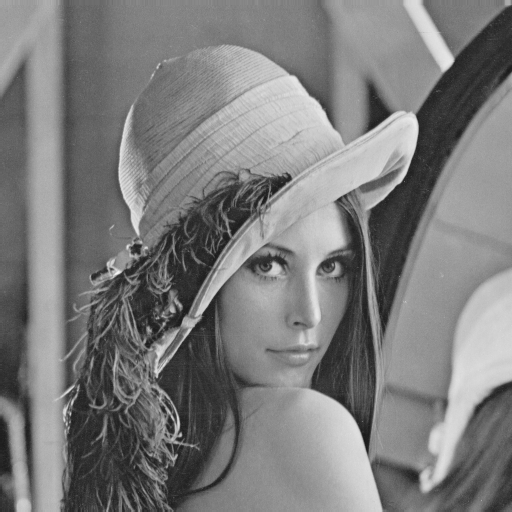

In [ ]:
cv2_imshow(obj2.original())

In [ ]:
# please use the octogonal 3-5-5-5-3 kernel.
kernel = [ [-2, -1], [-2, 0], [-2, 1], [-1, -2], [-1, -1], [-1, 0], [-1, 1], [-1, 2], [0, -2], [0, -1], [0, 0], [0, 1], [0, 2], [1, -2], [1, -1], [1, 0], [1, 1], [1, 2], [2, -1], [2, 0], [2, 1] ]

###(a) [Dilation (膨張)](https://en.wikipedia.org/wiki/Dilation_(morphology))
\begin{align}
\mathbf{B} \oplus \mathbf{K} = \cup_{k\in K}B_{k}
\end{align}

$B_{k}$ is the translation of B by k.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


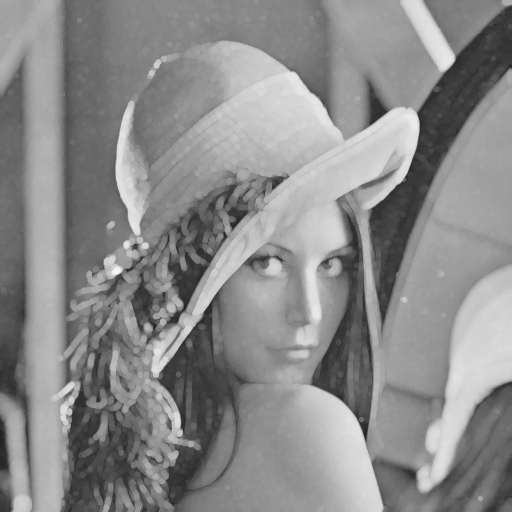

In [ ]:
dilated_image = obj2.dilation(obj2.original(),kernel)
cv2.imwrite( 'a_dilated_image.bmp', dilated_image )
cv2_imshow( dilated_image )

###(b) [Erosion (浸食)](https://en.wikipedia.org/wiki/Erosion_(morphology)#:~:text=Erosion%20(usually%20represented%20by%20%E2%8A%96,and%20subsequently%20to%20complete%20lattices.)

\begin{align}
\mathbf{B} \ominus \mathbf{K} = \cap_{k\in K}B_{-k}
\end{align}

$B_{-k}$ is the translation of B by -k.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


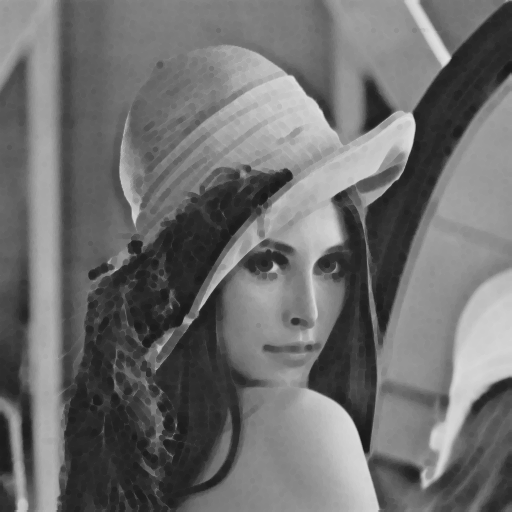

In [ ]:
eroded_image = obj2.erosion(obj2.original(),kernel)
cv2.imwrite( 'b_eroded_image.bmp', eroded_image )
cv2_imshow( eroded_image )

###(c) Opening

\begin{align}
\mathbf{B} | \mathbf{K} = (\mathbf{B} \ominus \mathbf{K})\oplus \mathbf{K}
\end{align}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

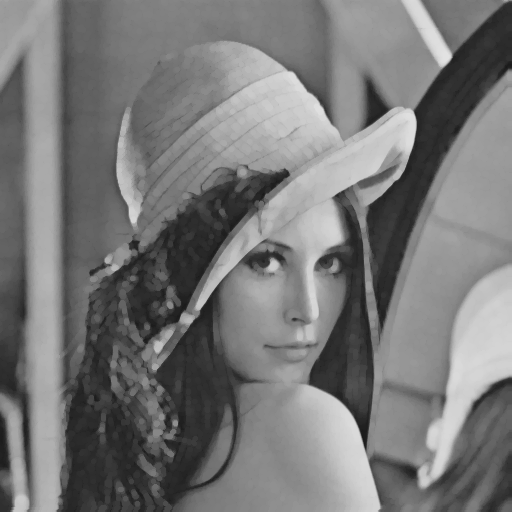

In [ ]:
opening_ = obj2.opening(obj2.original(),kernel)
cv2.imwrite( 'c_opening_.bmp', opening_ )
cv2_imshow( opening_ )

###(d) Closing

\begin{align}
\mathbf{B} \cdot \mathbf{K} = (\mathbf{B} \oplus \mathbf{K})\ominus \mathbf{K}
\end{align}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional inf

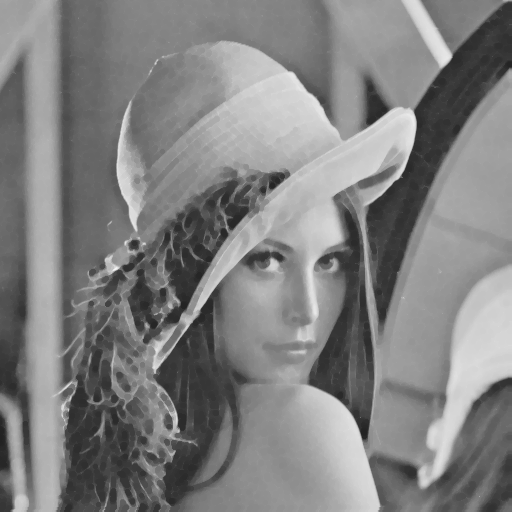

In [ ]:
closing_ = obj2.closing(obj2.original(),kernel)
cv2.imwrite( 'd_closing_.bmp', closing_ )
cv2_imshow( closing_ )

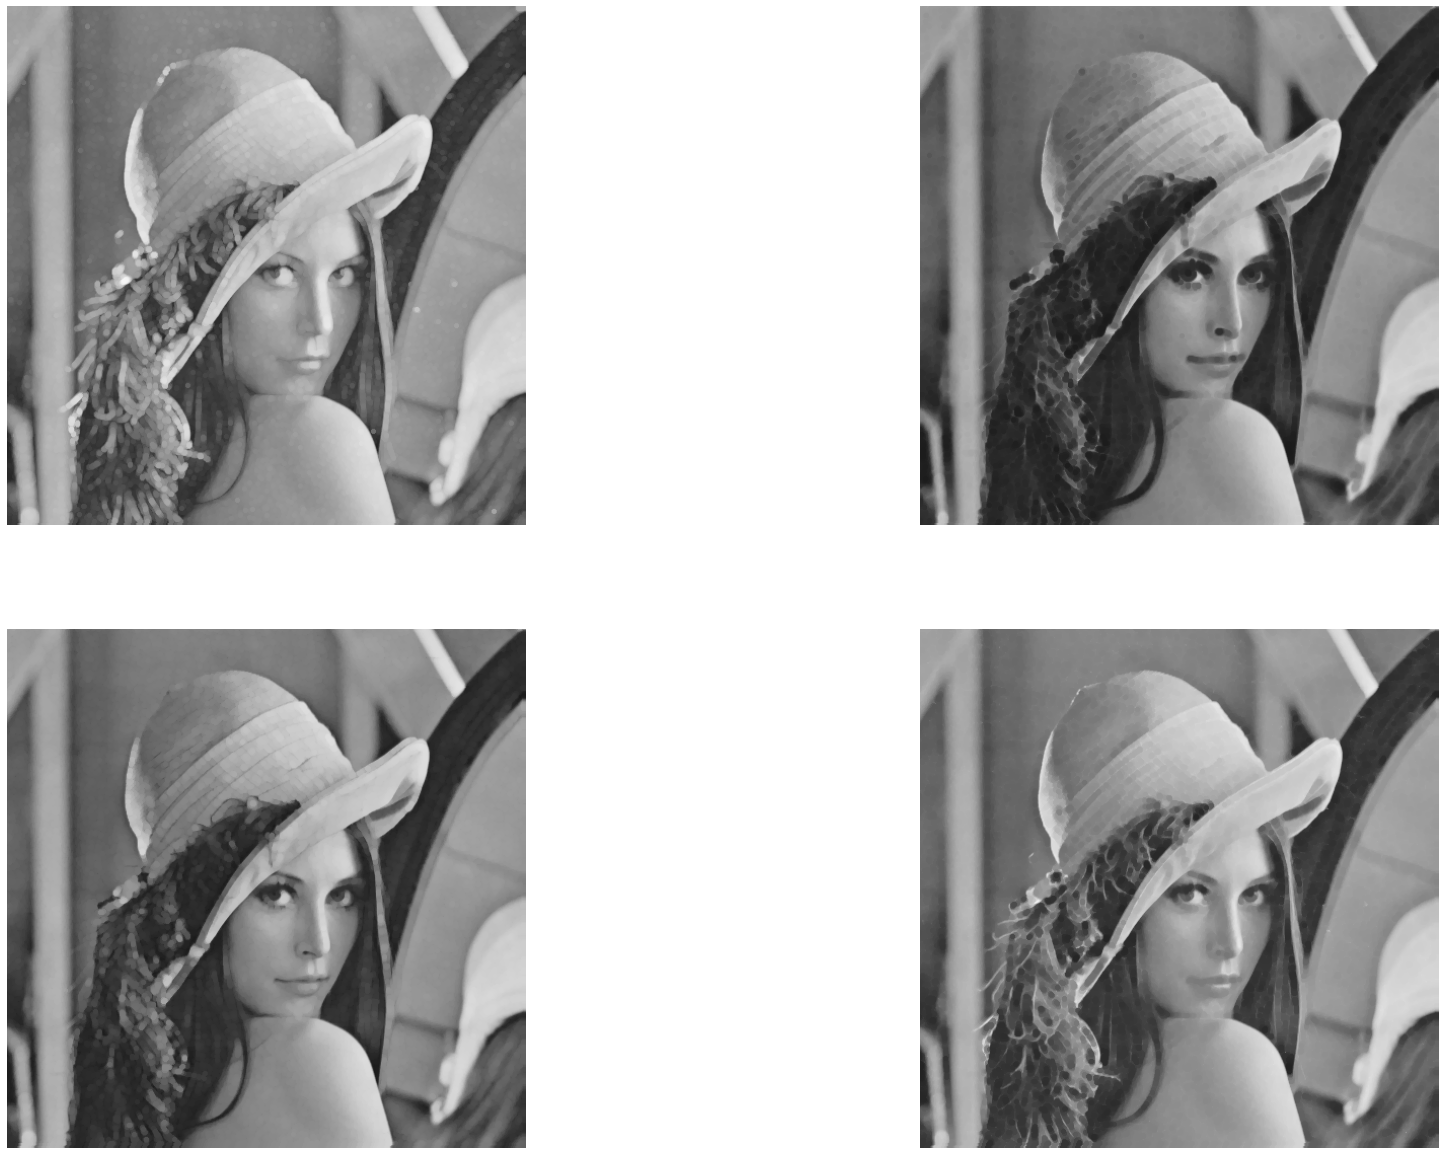

In [ ]:
# create figure
fig = plt.figure(figsize=(30, 21))

# setting values to rows and column variables
rows = 2
columns = 2


fig.add_subplot(rows, columns, 1 )
plt.imshow(cv2.imread("a_dilated_image.bmp"))
plt.axis('off')

fig.add_subplot(rows, columns, 2 )
plt.imshow(cv2.imread("b_eroded_image.bmp"))
plt.axis('off')

fig.add_subplot(rows, columns, 3 )
plt.imshow(cv2.imread("c_opening_.bmp"))
plt.axis('off')

fig.add_subplot(rows, columns, 4 )
plt.imshow(cv2.imread("d_closing_.bmp"))
plt.axis('off')
plt.savefig('final_result.png')